Winedata Clustering 

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

Reading the data

In [2]:
winedf = pd.read_csv('./winetestdata.csv')
winedf.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la BÃ©gude


Selecting the requried data

In [3]:
winedf=winedf[['description','variety']]
winedf

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,"This is the top wine from La BÃ©gude, named af...",Provence red blend
...,...,...
29996,This well-priced wine shows Cabernet's lighter...,Cabernet
29997,Sharp aromas of prickly red fruits and barrel ...,Cabernet Sauvignon
29998,"While the aromas have rustic overtones, the wi...",Pinot Noir
29999,"This fruity, soft wine is ready to drink. With...",Portuguese White


Checking the null values

In [5]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30001 non-null  object
 1   variety      30001 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


Checking the duplicate items

In [8]:
winedf[winedf['description'].duplicated(keep = False)].sort_values('description').head(8)

,description,variety
4545,A 50-50 blend of Cabernet Sauvignon and Sangio...,Red Blend
4405,A 50-50 blend of Cabernet Sauvignon and Sangio...,Red Blend
11690,"A 60-40 blend, this full-bodied, creamy textur...",Shiraz-Grenache
29780,"A 60-40 blend, this full-bodied, creamy textur...",Shiraz-Grenache
28334,"A GSM blend, aged in neutral oak, this is a da...",RosÃ©
10214,"A GSM blend, aged in neutral oak, this is a da...",RosÃ©
28133,A Garrafeira wine is a special selection and t...,Portuguese Red
353,A Garrafeira wine is a special selection and t...,Portuguese Red


Dropping the duplicate items

In [9]:
winedf = winedf.drop_duplicates('description')

Visualization of top 500 variety of wine

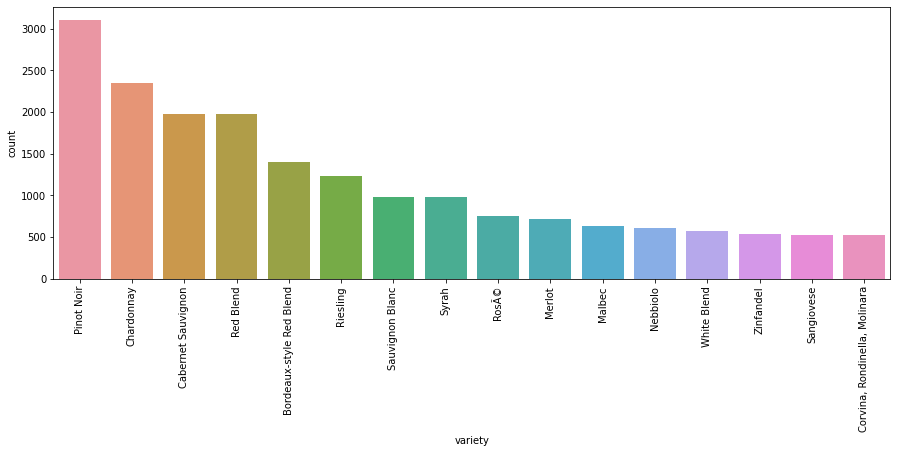

In [10]:
variety_df = winedf.groupby('variety').filter(lambda x: len(x) > 500)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

Displays the names of Top Quality Wines

In [11]:
variety_df['variety'].unique()

array(['Cabernet Sauvignon', 'Sauvignon Blanc', 'Pinot Noir',
       'Chardonnay', 'Malbec', 'RosÃ©', 'Syrah', 'Sangiovese',
       'Red Blend', 'Riesling', 'Nebbiolo', 'White Blend', 'Zinfandel',
       'Bordeaux-style Red Blend', 'Merlot',
       'Corvina, Rondinella, Molinara'], dtype=object)

Visualization of names of top quality wines

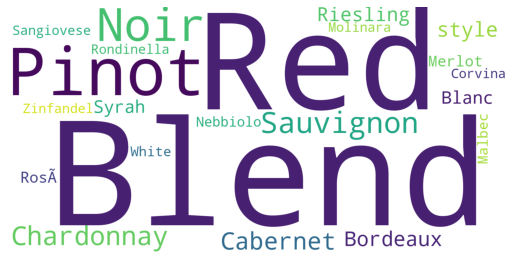

In [13]:
stopwords=set(STOPWORDS)
wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(variety_df['variety'])) 
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Modelling

In [14]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"] 
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = variety_df['description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

Converting the text to lowercase

In [15]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

Applying TF-ID Vectorizer

In [17]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)

Converting into Array

In [24]:
tf_idf_norm = normalize(X2)
tf_idf_array = tf_idf_norm.toarray()

Elbow Method

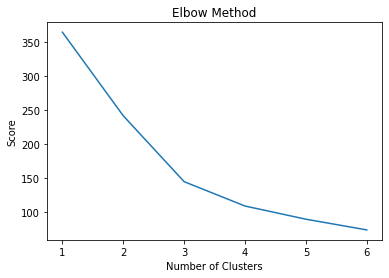

In [25]:
sklearn_pca = PCA(n_components = 2) #since scatter plot in 2-d
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 50) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Plotting the Scatter Plot

c:\Users\Abdul Wahid\My Files\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


CPU times: total: 469 ms
Wall time: 294 ms


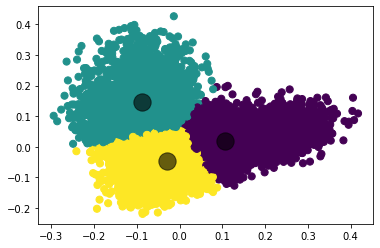

In [23]:
from sklearn.cluster import KMeans
n_clusters = 3

kmeans = KMeans(n_clusters= n_clusters, max_iter=50, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

Visualizing the Clustered Data

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

Cluster 1 

<AxesSubplot:xlabel='score', ylabel='features'>

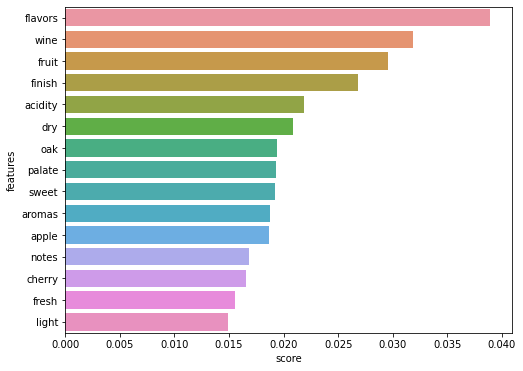

In [23]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

CLuster 2

<AxesSubplot:xlabel='score', ylabel='features'>

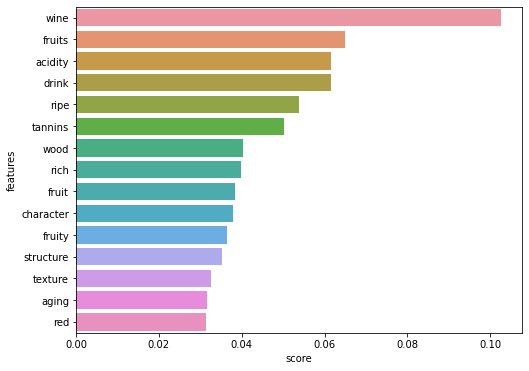

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])

Cluster 3

<AxesSubplot:xlabel='score', ylabel='features'>

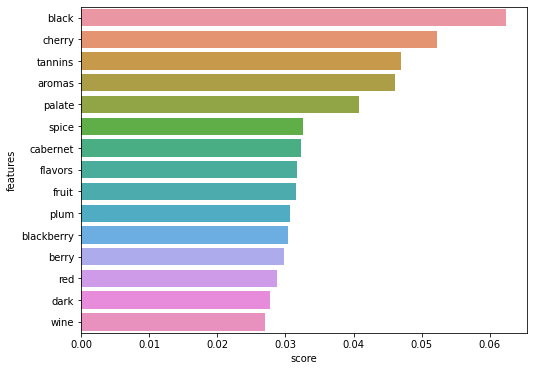

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:15])

Creating CSV files to save the Clusters

In [26]:
for i, df in enumerate(dfs):
    df.to_csv('df_'+str(i)+'.csv')

Plotting the Clusters with their scores

C:\Users\Abdul Wahid\AppData\Local\Temp\ipykernel_7816\2995603474.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  yticks = ax.set_yticklabels(df.features)


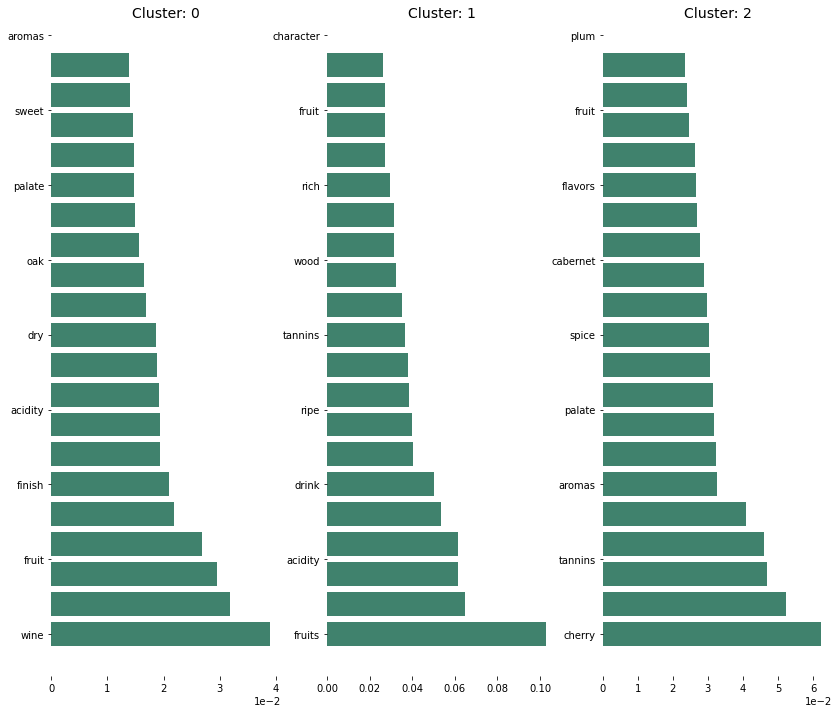

In [27]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)